In [48]:
%matplotlib notebook

import pathlib
import json
import h5py
import numpy as np
import matplotlib.pyplot as plt

import ncempy.io as nio

# Quick view FEI EMD file
- Set the directory name and then the file name
- Opens image data and parses meta data (extracts detector name and pixel sizes)
- Show images in a 2xN set of columns
- Use the last cell to save this for easy viewing

In [49]:
#Setup file name
dName = pathlib.Path(r'C:\Users\linol\Downloads')
fName = pathlib.Path('1435 1.2 Mx STEM HAADF-DF4-DF2-BF.emd')

EMD file contains 4 data sets
Dataset #0 from detector: DF4
Dataset #1 from detector: HAADF
Dataset #2 from detector: DF2
Dataset #3 from detector: BF
pixel size = (0.0849, 0.0849) nm


<IPython.core.display.Javascript object>


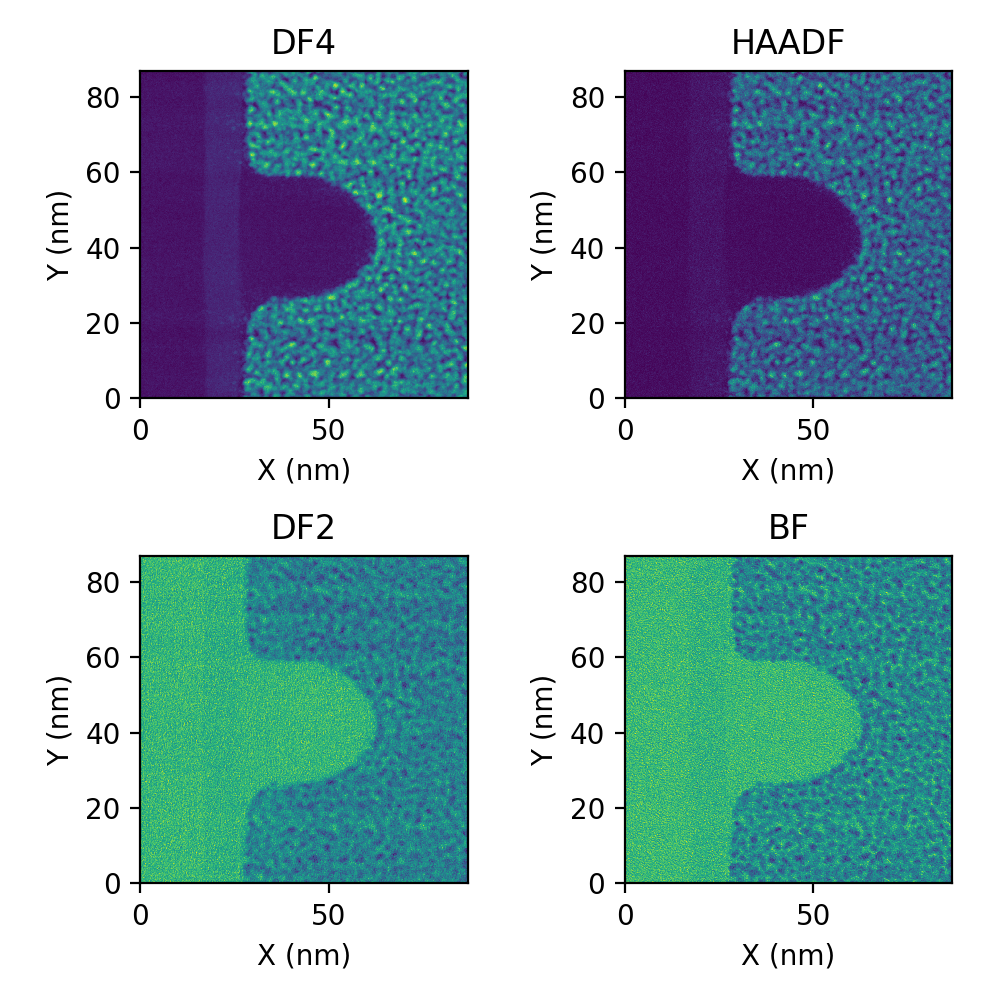

In [50]:
with nio.emdVelox.fileEMDVelox(str(dName / fName)) as emd0:
    print(emd0) # print out information about the emd dataset
    if len(emd0.list_data) > 1:
        multipleFlag = True
        fg1, ax1 = plt.subplots(nrows=round(len(dsetGroups)/2+0.1),ncols=2,figsize=(5,5)) #two columns
        ax1 = ax1.ravel()
    else:
        fg1, ax1 = plt.subplots(nrows=1,ncols=1,figsize=(5,5)) #two columns
    
    for ii,dset in enumerate(emd0.list_data):
        dd, md = emd0.get_dataset(dset)
        
        # Plot all of the images
        if multipleFlag:
            fovX = md['pixelSize'][0]*dd.shape[0]
            fovY = md['pixelSize'][1]*dd.shape[1]
            ax1[ii].imshow(dd,extent=[0,fovX,0,fovY],origin='lower')
            ax1[ii].set(xlabel='X (nm)',ylabel='Y (nm)',title=detectorName[ii])
        else:
            fovX = md['pixelSize'][0]*dd.shape[0]
            fovY = md['pixelSize'][1]*dd.shape[1]
            ax1.imshow(dd,extent=[0,fovX,0,fovY],origin='lower')
            ax1.set(xlabel='X (nm)',ylabel='Y (nm)',title=detectorName[ii])
fg1.tight_layout()

# Save the figure with a high dpi (for display only)
- Note: The TIF file will look exactly like the figure above and is for convenience only.
- Use ncempy.io.emdVelox to get the raw data for analysis.

In [51]:
fg1.savefig((dName / fName.with_suffix('.tif')).as_posix(),dpi=300)

# Print and write out the metadata as text
- In the EMD file, the metadata (experimental details like accelerating voltage, pixel size, apertures, extraction voltage, etc.) is stored in the format of a JSON file.

In [52]:
import pprint
pp = pprint.PrettyPrinter(indent=0)

#Print out the meta data
with nio.emdVelox.fileEMDVelox(str(dName / fName)) as emd0:
    emd0.parseMetaData(emd0.list_data[0])
    pp.pprint(emd0.metaDataJSON)

#Write to txt file with nice printing
with open(dName / fName.with_suffix('.txt'),'w') as f0:
    f0.write(pp.pformat(jj))

{'Acquisition': {'AcquisitionDatetime': {'DateTime': '0'},
               'AcquisitionStartDatetime': {'DateTime': '1524605728'},
               'BeamType': '',
               'SourceType': 'XFEG'},
'BinaryResult': {'AcquisitionUnit': '',
                'CompositionType': '',
                'Detector': 'DF4',
                'DetectorIndex': '3',
                'Encoding': '',
                'Offset': {'x': '-4.3477386684438299e-008',
                          'y': '-4.3477386684438299e-008'},
                'PixelSize': {'height': '8.4916770868043554e-011',
                             'width': '8.4916770868043554e-011'},
                'PixelUnitX': 'm',
                'PixelUnitY': 'm'},
'Core': {'MetadataDefinitionVersion': '7.9',
        'MetadataSchemaVersion': 'v1/2013/07',
        'guid': '00000000000000000000000000000000'},
'CustomProperties': {'Aperture[C1].Name': {'type': 'string', 'value': '2000'},
                    'Aperture[C2].Name': {'type': 'string', 'value': 